In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import networkx as nx

In [2]:
from enhance_pathway import enhance, build_graph, get_node_labels

In [3]:
!ls data

gene2ncbi.json
gene2pubmed
gene_info
Homo_sapiens.gene_info
Homo_sapiens.gene_info.gz
NCI-Nature-Curated-final.bp3.owl
nfkappab.sifpp
nfkappab.tsv
non_alt_loci_set.json
PathwayCommons10.All.BIOPAX.owl
PathwayCommons10.All.hgnc.sif
PathwayCommons10.All.hgnc.sif.gz
reactome.homo_sapiens.interactions.tab-delimited.txt
reactome.sifpp
Release2.0.zip
toutanova


In [4]:
with open('data/nfkappab.sifpp') as f_path, open('data/reactome.sifpp') as f_kb:
    G_kb, edge_labels_kb = build_graph(f_kb)
    G_path, edge_labels_path = build_graph(f_path)
    

In [20]:
G_kb_r = G_kb.subgraph(G_path.nodes)
path_node_labels = get_node_labels(G_path)
kb_r_node_labels = get_node_labels(G_kb_r)
edge_labels_kb_r = {k: v for k, v in edge_labels_kb.items() if k[0] in G_path.nodes and k[1] in G_path.nodes}

/home/leon/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/leon/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/leon/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


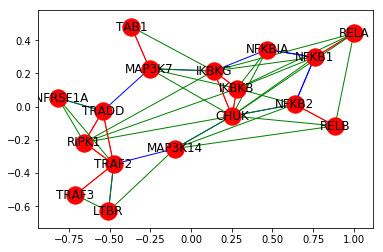

In [24]:
pos = nx.spring_layout(G_path)
nx.draw_networkx_nodes(G_path, pos=pos)
nx.draw_networkx_labels(G_path, pos=pos, labels=path_node_labels)
reg_edges = [k for k, v in edge_labels_path.items() if 'regulation' in v.lower()]
com_edges = [k for k, v in edge_labels_path.items() if 'complex' in v.lower()]
nx.draw_networkx_edges(G_path, pos=pos, edgelist=reg_edges, edge_color='b')
nx.draw_networkx_edges(G_path, pos=pos, edgelist=com_edges, edge_color='r')
reg_edges = [k for k, v in edge_labels_kb_r.items() if 'reaction' in v.lower() and k not in edge_labels_path]
nx.draw_networkx_edges(G_kb_r, pos=pos, edgelist=reg_edges, edge_color='g')

/home/leon/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/leon/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


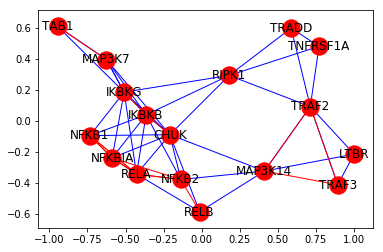

In [22]:
pos = nx.spring_layout(G_kb_r)
nx.draw_networkx_nodes(G_kb_r, pos=pos)
nx.draw_networkx_labels(G_kb_r, pos=pos, labels=kb_r_node_labels)
reg_edges = [k for k, v in edge_labels_kb_r.items() if 'reaction' in v.lower()]
com_edges = [k for k, v in edge_labels_kb_r.items() if 'complex' in v.lower()]
nx.draw_networkx_edges(G_kb_r, pos=pos, edgelist=reg_edges, edge_color='b')
nx.draw_networkx_edges(G_kb_r, pos=pos, edgelist=com_edges, edge_color='r')

In [6]:
reactions

defaultdict(list,
            {('LTBR', 'LTBR'): ['24248355'],
             ('IKBKB', 'NFKBIA'): ['9315679|9135156|9721103|9914500|10593898',
              '9346484|12791687',
              '9252186',
              '17047224|10723127',
              '9252186|17363905|15145317|15371334|8601309'],
             ('IKBKG', 'NFKBIA'): ['9315679|9135156|9721103|9914500|10593898'],
             ('CHUK', 'NFKBIA'): ['9315679|9135156|9721103|9914500|10593898'],
             ('CHUK', 'RELA'): ['9315679|9135156|9721103|9914500|10593898'],
             ('IKBKG', 'RELA'): ['9315679|9135156|9721103|9914500|10593898'],
             ('IKBKB', 'RELA'): ['9315679|9135156|9721103|9914500|10593898',
              '9252186',
              '18412279|22078572|14523047|15337789|23708964',
              '17047224|10723127',
              '9252186|17363905|15145317|15371334|8601309'],
             ('IKBKG', 'NFKB1'): ['9315679|9135156|9721103|9914500|10593898'],
             ('CHUK', 'NFKB1'): ['9315679|9135156|